Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [3]:
crime_data=pd.read_csv('crime_data.csv',index_col='United_States')

In [4]:
crime_data

,Murder,Assault,UrbanPop,Rape
United_States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
crime_data.isnull()


,Murder,Assault,UrbanPop,Rape
United_States,,,,
Alabama,False,False,False,False
Alaska,False,False,False,False
Arizona,False,False,False,False
Arkansas,False,False,False,False
California,False,False,False,False
Colorado,False,False,False,False
Connecticut,False,False,False,False
Delaware,False,False,False,False
Florida,False,False,False,False


In [7]:
crime_data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: ylabel='United_States'>

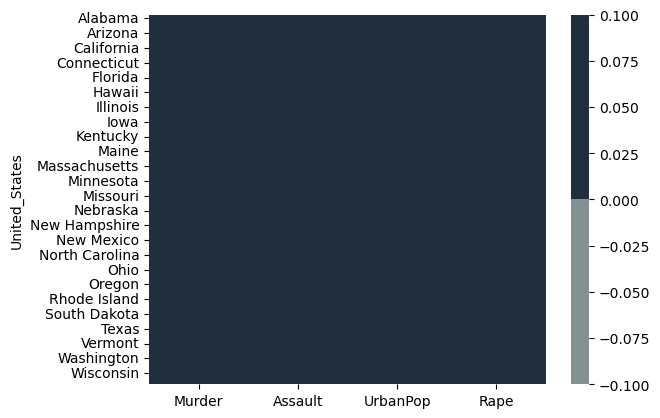

In [8]:
color=['#839192','#212F3C']
pal=sns.color_palette(color)
sns.heatmap(crime_data.isnull(),cmap=pal)

In [9]:
crime_data.duplicated()

United_States
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota      False
Te

In [10]:
crime_data[crime_data.duplicated()]

,Murder,Assault,UrbanPop,Rape
United_States,,,,


In [11]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

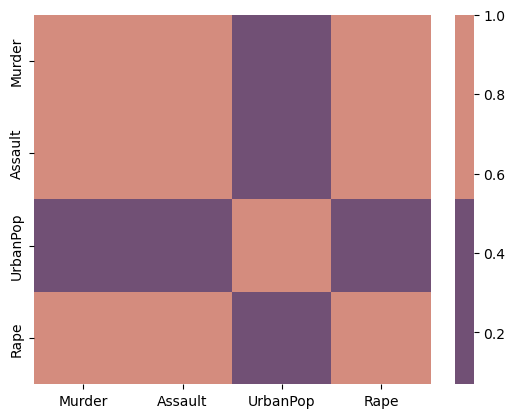

In [13]:
color=['#715075','#D48C7E']
pal=sns.color_palette(color)
sns.heatmap(crime_data.corr(),cmap=pal)

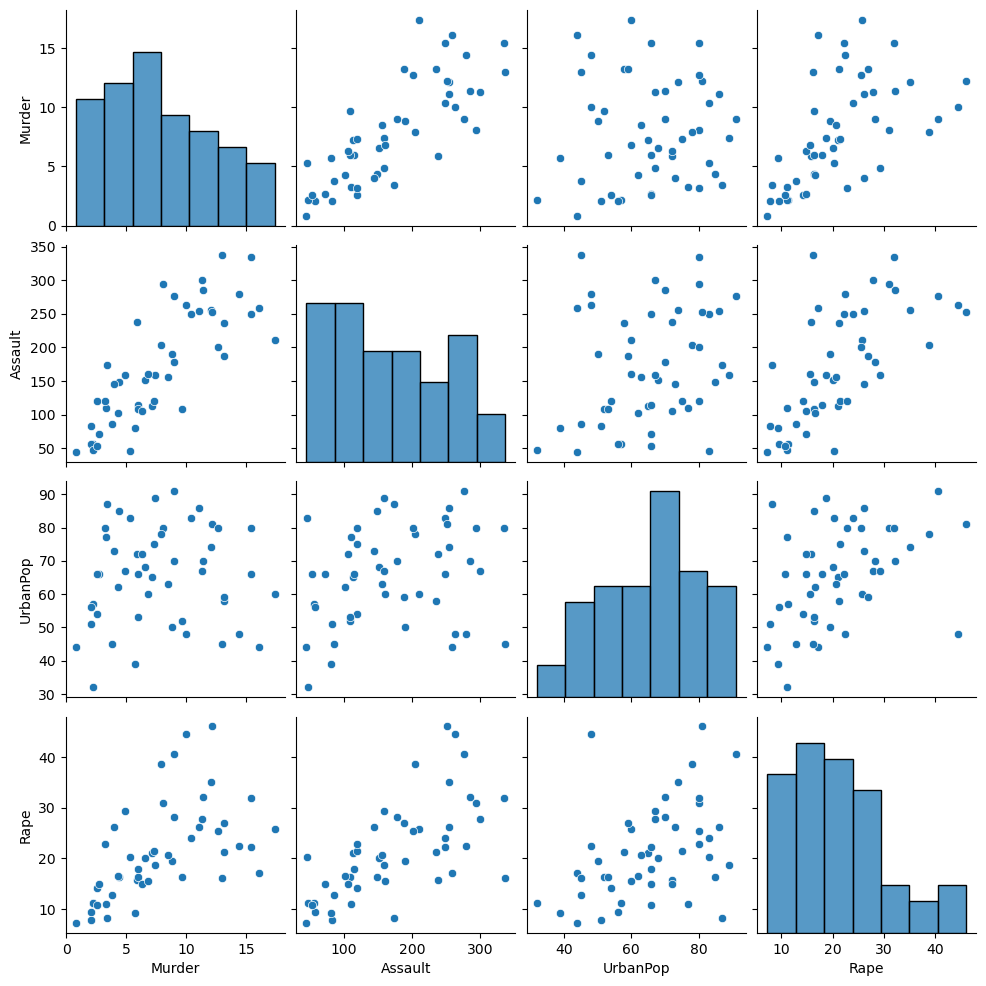

In [14]:
sns.pairplot(data=crime_data)

# KMEANS-clustering

# Scale the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sd_scaler=StandardScaler()

In [19]:
scaled_data=sd_scaler.fit_transform(crime_data)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Build the model


In [21]:
from sklearn.cluster import KMeans

In [22]:
kmodel=KMeans(n_clusters=3,random_state=42)

In [23]:
kmodel.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [24]:
kmodel.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [25]:
crime_data['Label']=kmodel.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Label
United_States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


# Hyperparameter Tuning

In [27]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(crime_data)
    wcss.append(model.inertia_)
wcss    
    

[355837.7416,
 96428.89021346468,
 47988.90285714286,
 34748.26685714286,
 24518.988190476193,
 18891.269777777776,
 15478.395999999999,
 13344.252452380952,
 12337.431666666667,
 10484.42119047619]

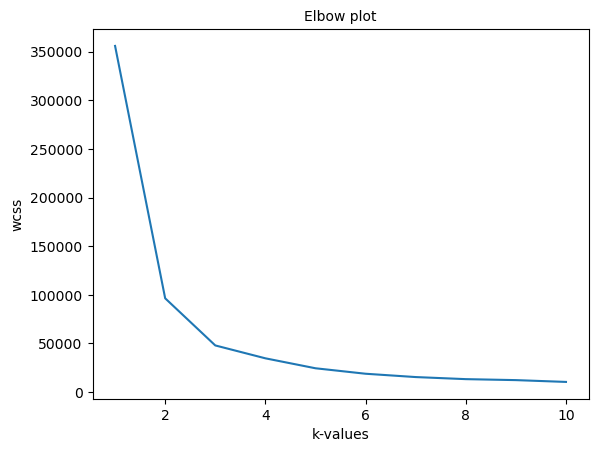

In [28]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.show()

# Build the final model with k=3 

In [30]:
fin_model=KMeans(n_clusters=3,random_state=42)

In [31]:
fin_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [32]:
fin_model.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [33]:
crime_data['Label']=fin_model.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Label
United_States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [34]:
grp=crime_data.groupby('Label')

In [35]:
for x,y in grp:
    print(x)

0
1
2


In [36]:
for x,y in grp:
    print(y)
    print(55*'_')

               Murder  Assault  UrbanPop  Rape  Label
United_States                                        
Connecticut       3.3      110        77  11.1      0
Delaware          5.9      238        72  15.8      0
Hawaii            5.3       46        83  20.2      0
Indiana           7.2      113        65  21.0      0
Kansas            6.0      115        66  18.0      0
Massachusetts     4.4      149        85  16.3      0
New Jersey        7.4      159        89  18.8      0
Ohio              7.3      120        75  21.4      0
Oklahoma          6.6      151        68  20.0      0
Oregon            4.9      159        67  29.3      0
Pennsylvania      6.3      106        72  14.9      0
Rhode Island      3.4      174        87   8.3      0
Utah              3.2      120        80  22.9      0
Virginia          8.5      156        63  20.7      0
Washington        4.0      145        73  26.2      0
Wyoming           6.8      161        60  15.6      0
____________________________

In [37]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Label,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


# Hierarchical Agglomerative Clustering

# Scale the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
mn_scaler=MinMaxScaler()

In [42]:
scaled_mn=mn_scaler.fit_transform(crime_data)
scaled_mn

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 0.5       ],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.5       ],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 0.5       ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 1.        ],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 0.5       ],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951, 0.5       ],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121, 0.        ],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824, 0.        ],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891, 0.5       ],
       [1.        , 0.56849315, 0.47457627, 0.47803618, 0.5       ],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333, 0.        ],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457, 1.        ],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455, 0.5       ],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517, 0.        ],
       [0.08433735, 0.03767123, 0.

# Build the model

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
hac_model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [46]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [47]:
hac_model.labels_

array([0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [48]:
crime_data['HAC_Labels']=hac_model.labels_

In [49]:
crime_data

,Murder,Assault,UrbanPop,Rape,Label,HAC_Labels
United_States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,2,1
California,9.0,276,91,40.6,1,0
Colorado,7.9,204,78,38.7,1,0
Connecticut,3.3,110,77,11.1,0,2
Delaware,5.9,238,72,15.8,0,2
Florida,15.4,335,80,31.9,1,0


In [50]:
hac_grp=crime_data.groupby('HAC_Labels')

In [51]:
for x,y in grp:
    print(x)

0
1
2


In [52]:
for x,y in grp:
    print(y)

               Murder  Assault  UrbanPop  Rape  Label  HAC_Labels
United_States                                                    
Connecticut       3.3      110        77  11.1      0           2
Delaware          5.9      238        72  15.8      0           2
Hawaii            5.3       46        83  20.2      0           2
Indiana           7.2      113        65  21.0      0           2
Kansas            6.0      115        66  18.0      0           2
Massachusetts     4.4      149        85  16.3      0           2
New Jersey        7.4      159        89  18.8      0           2
Ohio              7.3      120        75  21.4      0           2
Oklahoma          6.6      151        68  20.0      0           2
Oregon            4.9      159        67  29.3      0           2
Pennsylvania      6.3      106        72  14.9      0           2
Rhode Island      3.4      174        87   8.3      0           2
Utah              3.2      120        80  22.9      0           2
Virginia  

In [53]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Label,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


# Plot the dendrogram

In [55]:
from scipy.cluster import hierarchy

In [56]:
hr=hierarchy.linkage(scaled_mn,method='complete')

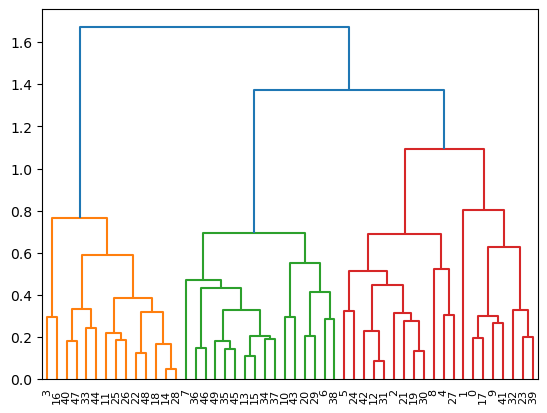

In [57]:
dn=hierarchy.dendrogram(hr)

# DBscan-clustering

In [59]:
from sklearn.cluster import DBSCAN


In [60]:
model=DBSCAN(eps=0.5,min_samples=5)

In [61]:
model.fit(scaled_mn)

DBSCAN()

In [62]:
model.labels_

array([ 0, -1,  0,  1,  0,  0,  2,  2,  0,  0,  2,  1,  0,  2,  1,  2,  1,
        0,  1,  0,  2,  0,  1,  0,  0,  1,  1,  0,  1,  2,  0,  0,  0,  1,
        2,  2,  2,  2,  2,  0,  1,  0,  0,  2,  1,  2,  2,  1,  1,  2],
      dtype=int64)

In [63]:
crime_data['DBscan_Label']=model.labels_
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Label,HAC_Labels,DBscan_Label
United_States,,,,,,,
Alabama,13.2,236,58,21.2,1,0,0
Alaska,10.0,263,48,44.5,1,0,-1
Arizona,8.1,294,80,31.0,1,0,0
Arkansas,8.8,190,50,19.5,2,1,1
California,9.0,276,91,40.6,1,0,0


In [64]:
dbscan_grp=crime_data.groupby('DBscan_Label')

In [65]:
for x,y in grp:
    print(x)

0
1
2


In [66]:
for x,y in grp:
    print(y)
    print(50*'-')

               Murder  Assault  UrbanPop  Rape  Label  HAC_Labels  \
United_States                                                       
Connecticut       3.3      110        77  11.1      0           2   
Delaware          5.9      238        72  15.8      0           2   
Hawaii            5.3       46        83  20.2      0           2   
Indiana           7.2      113        65  21.0      0           2   
Kansas            6.0      115        66  18.0      0           2   
Massachusetts     4.4      149        85  16.3      0           2   
New Jersey        7.4      159        89  18.8      0           2   
Ohio              7.3      120        75  21.4      0           2   
Oklahoma          6.6      151        68  20.0      0           2   
Oregon            4.9      159        67  29.3      0           2   
Pennsylvania      6.3      106        72  14.9      0           2   
Rhode Island      3.4      174        87   8.3      0           2   
Utah              3.2      120    

In [67]:
X1=crime_data.iloc[:,0:4]
y_crime=crime_data.iloc[:,4]

In [68]:
X1

,Murder,Assault,UrbanPop,Rape
United_States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


# visualise the data for KMeans_cluster(crime data set)

In [70]:
from sklearn.manifold import TSNE

In [71]:
model=TSNE(n_components=2)

In [72]:
tsne_comps=model.fit_transform(X1)
tsne_comps

array([[-10.520209 ,  -1.3808776],
       [ -9.979379 ,  -1.1804023],
       [ -9.593576 ,  -1.5788513],
       [-11.568378 ,  -1.540311 ],
       [ -9.780599 ,  -1.7470137],
       [-11.17721  ,  -1.5432445],
       [-13.62905  ,  -1.3080819],
       [-10.498233 ,  -1.4813317],
       [ -9.260766 ,  -1.4852353],
       [-11.029801 ,  -1.4956124],
       [-14.714696 ,  -1.2499871],
       [-13.433671 ,  -1.8402579],
       [-10.259048 ,  -1.6484213],
       [-13.544032 ,  -1.6359591],
       [-14.641036 ,  -1.5665367],
       [-13.494731 ,  -1.6247188],
       [-13.713001 ,  -1.8672501],
       [-10.284583 ,  -1.3771162],
       [-14.24183  ,  -1.7960446],
       [ -9.541572 ,  -1.4176518],
       [-12.672898 ,  -1.4177487],
       [-10.153142 ,  -1.5786769],
       [-14.354678 ,  -1.3669872],
       [-10.084381 ,  -1.1350996],
       [-11.863711 ,  -1.5518165],
       [-13.718254 ,  -1.8390805],
       [-13.857857 ,  -1.4747763],
       [-10.166861 ,  -1.7398434],
       [-14.630253 ,

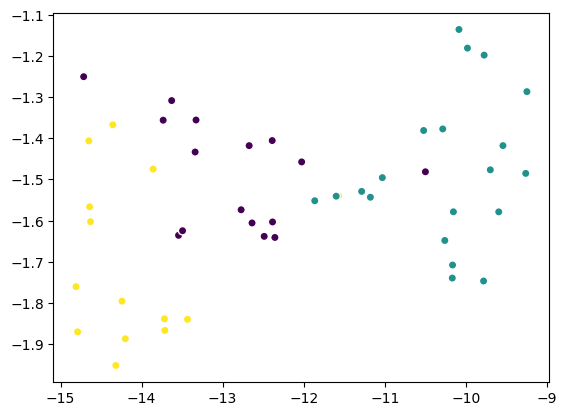

In [73]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y_crime,cmap='viridis',edgecolors='white')
plt.show()

# visualise the data for Hierarchical Agglomerative Clustering_cluster(crime data set)

In [75]:
y1_crime=crime_data.iloc[:,5]

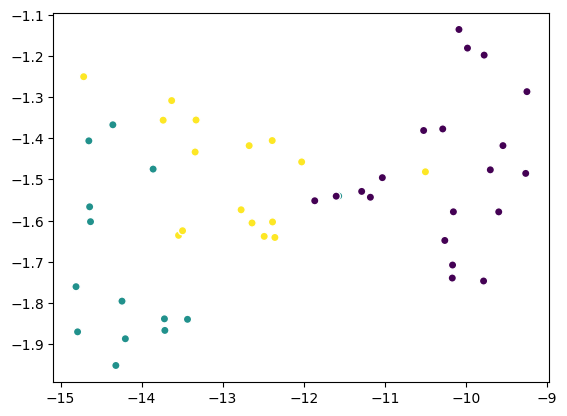

In [76]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y1_crime,cmap='viridis',edgecolors='white')
plt.show()

# visualise the data for DBscan_cluster(crime data set)

In [78]:
y2_crime=crime_data.iloc[:,6]

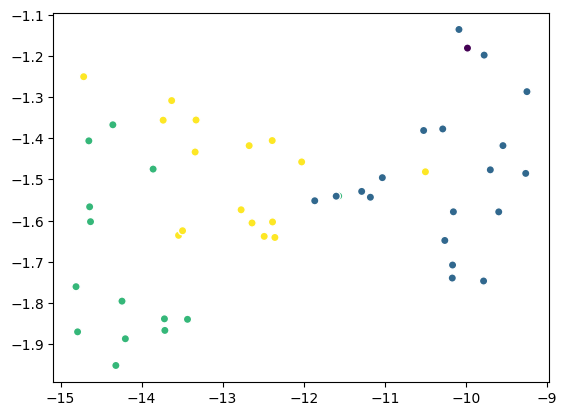

In [79]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y2_crime,cmap='viridis',edgecolors='white')
plt.show()

# inferance point for crime data

from given data build the culstering model for KMeans clustering ,Hierarchical Agglomerative Clustering 
and Dbscan clustering build the model sucessfully i got label values from kmeans cluster (0,1,2),Hierarchical Agglomerative Clustering
(0,1,2) and Dbscan(-1) i didn't get any core and border points based on the model(eps ,min_sample)

#	Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

# read the data

In [82]:
airlines=pd.read_csv('EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [83]:
airlines.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [84]:
airlines.shape

(3999, 12)

In [85]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [86]:
airlines.isnull()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
airlines.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

<Axes: >

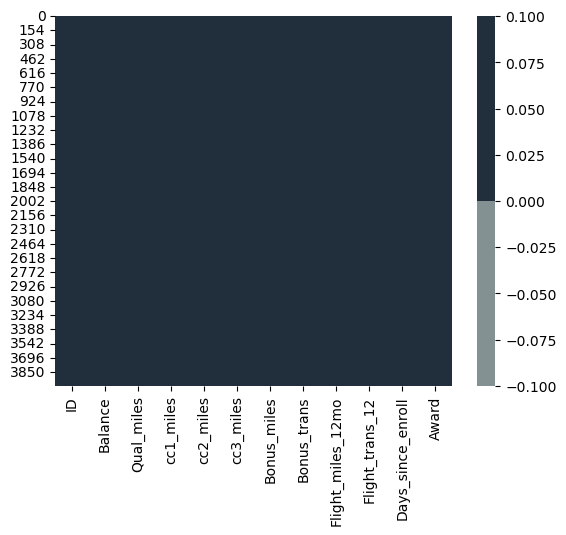

In [88]:
color=['#839192','#212F3C']
pal=sns.color_palette(color)
sns.heatmap(airlines.isnull(),cmap=pal)

In [89]:
airlines.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

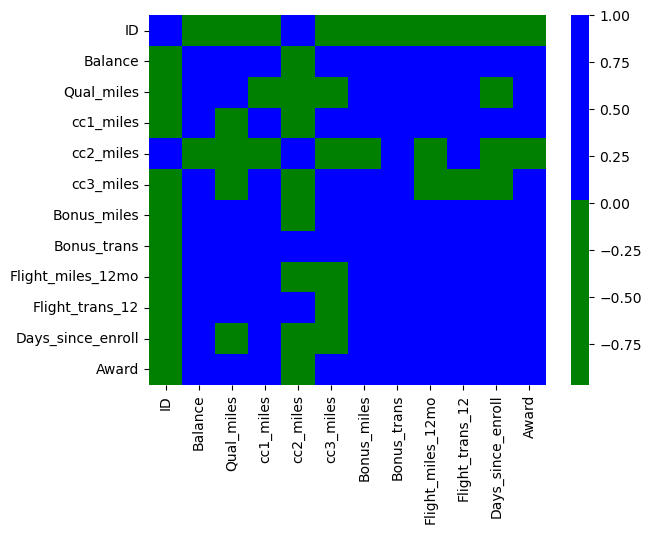

In [90]:
color=['green','blue']
pal=sns.color_palette(color)
sns.heatmap(airlines.corr(),cmap=pal)

In [91]:
airlines.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [92]:
airlines[airlines.duplicated()]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


In [93]:
airlines.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


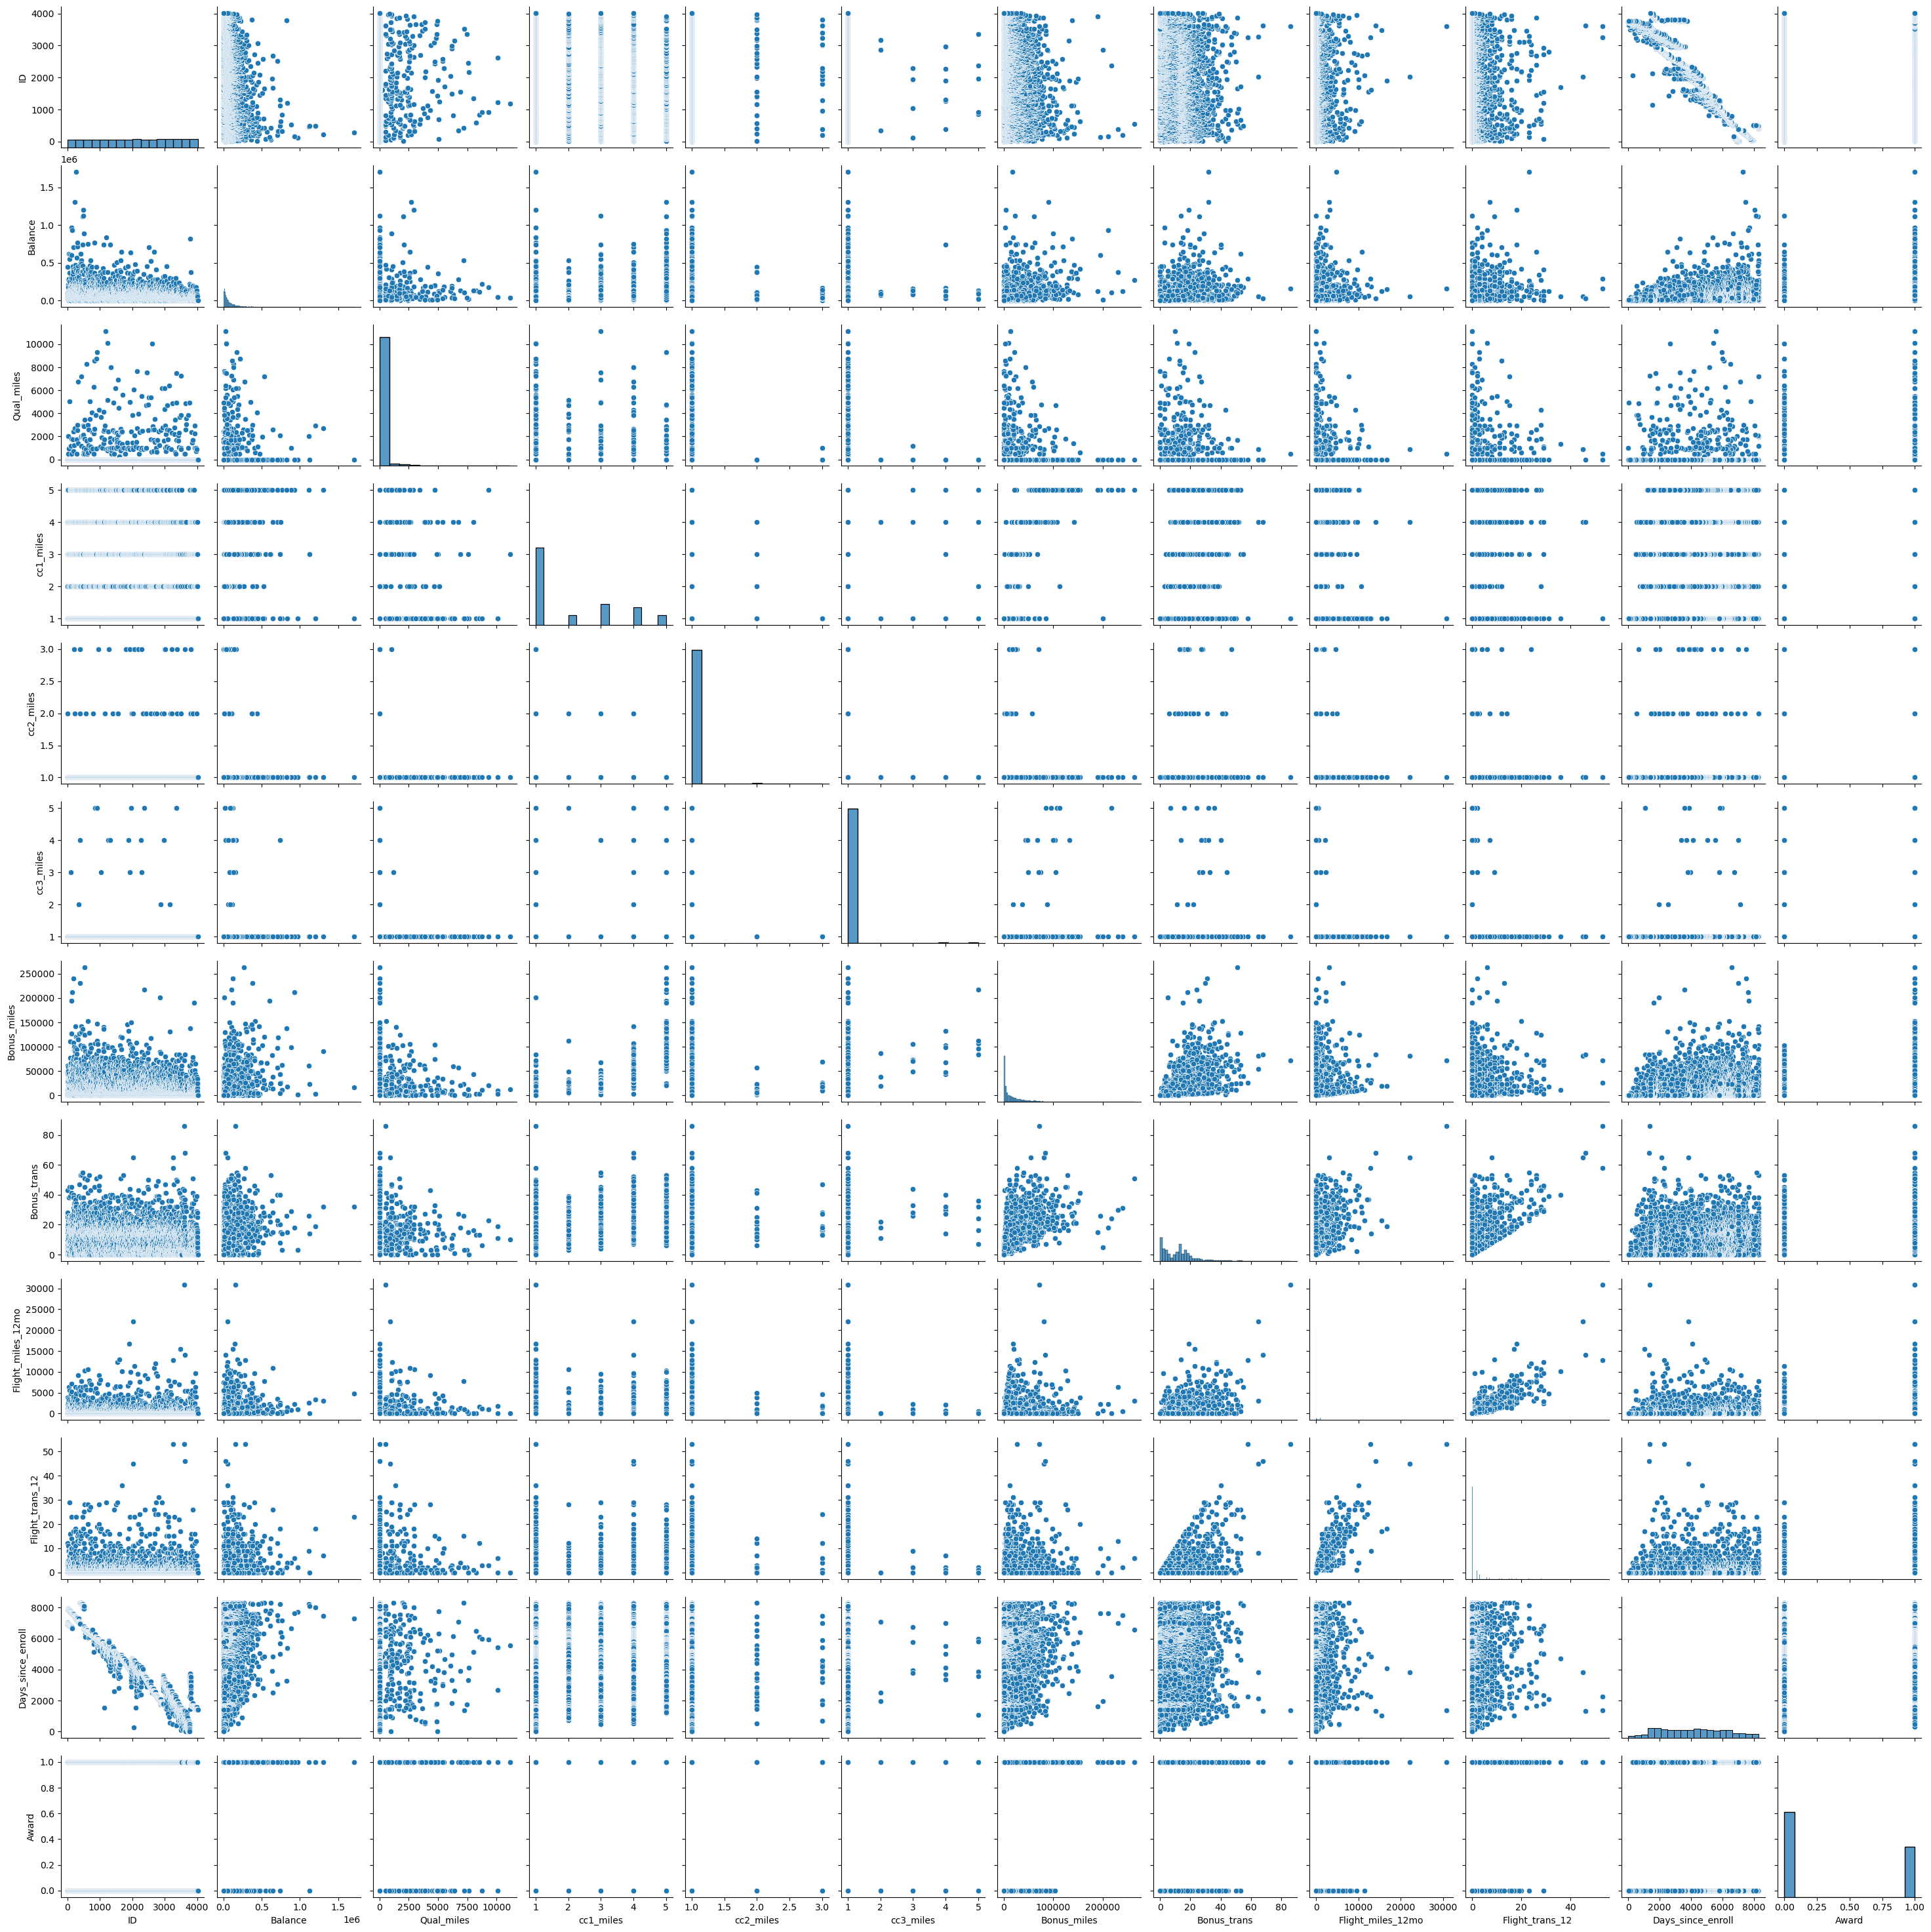

In [94]:
sns.pairplot(data=airlines)
plt.show()

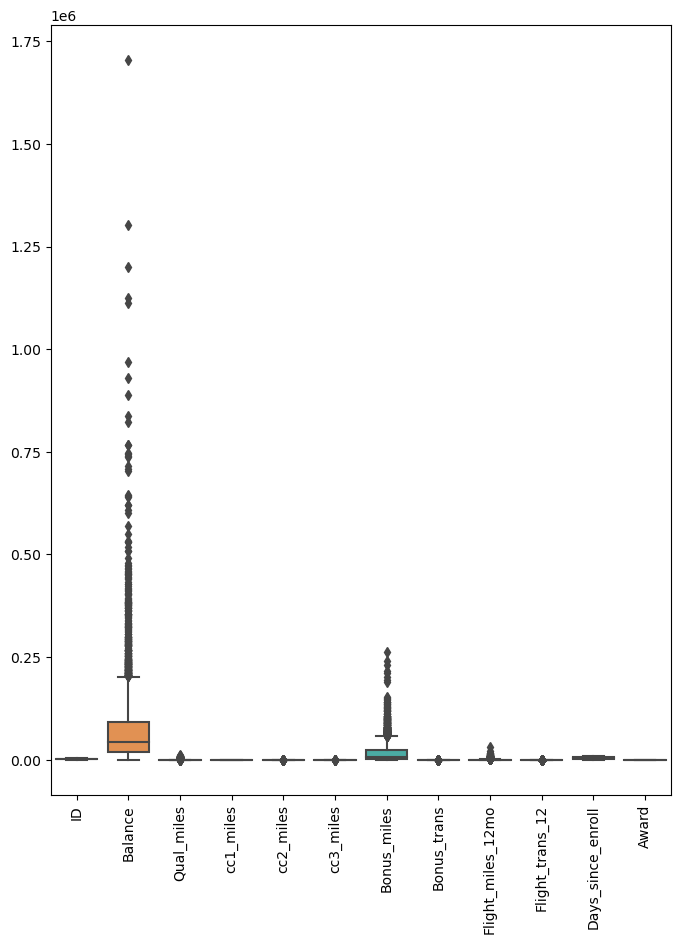

In [95]:
plt.figure(figsize=(8,10))
sns.boxplot(data=airlines)
plt.xticks(rotation=90)
plt.show()

# Scale the data

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sd_scaler=StandardScaler()

In [98]:
scaled_data=sd_scaler.fit_transform(airlines)

In [99]:
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# Kmeans_clustering

# build the model

In [102]:
from sklearn.cluster import KMeans

In [103]:
kmodel=KMeans(n_clusters=3,random_state=42)

In [104]:
kmodel.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [105]:
kmodel.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
airlines['Kmeans_labels']=kmodel.labels_

In [107]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


# Hyperparameter tuning

In [109]:
wcss=[]
for i in range(1,11):
    model= KMeans(n_clusters=i,random_state=42)
    model.fit(airlines)
    wcss.append(model.inertia_)
wcss

[42967206848564.15,
 20828852095394.375,
 11797435959417.791,
 7554668287151.56,
 5729432724781.719,
 4546507929783.358,
 3702347058268.654,
 3277003113196.397,
 2905263005563.1436,
 2638311522162.551]

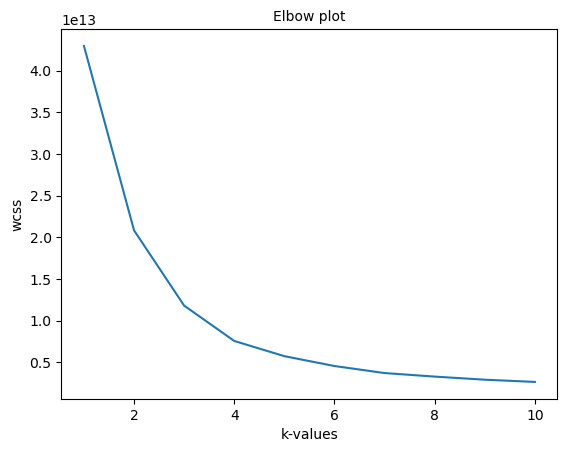

In [110]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.show()

# build the final model k=3

In [112]:
final_model=KMeans(n_clusters=3,random_state=42)

In [113]:
final_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [114]:
final_model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [115]:
airlines['Kmeans_labels']=final_model.labels_
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [116]:
kmean_grp=airlines.groupby('Kmeans_labels')

In [117]:
for x,y in kmean_grp:
    print(x)

0
1
2


In [118]:
for x,y in kmean_grp:
    print(y)
    print(60*'-')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
42      43    60313           0          1          1          1        10000   
50      51   108137           0          1          1          1         6368   
...    ...      ...         ...        ...        ...        ...          ...   
3907  3930   126490           0          1          1          1         8808   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   
3950  3973    59650           0          1          1          1         5050   

      Bonus_trans  Flight_m

In [119]:
kmean_grp.agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_labels,,,,,,,,,,,,
0,1753.128049,189304.225610,788.689024,2.182927,1.036585,1.000000,31780.481707,27.115854,5420.414634,15.841463,4657.036585,0.810976
1,2324.241897,42286.342688,92.323715,1.246245,1.019368,1.000000,4903.299209,7.000395,195.184585,0.601976,3554.698419,0.204743
2,1447.829885,119771.163985,163.517241,3.620690,1.002299,1.037548,39038.232950,18.573180,350.190038,1.051341,5144.044444,0.636015


# Hierarchical Agglomerative Clustering

# Scale the data

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
mn_scaled=MinMaxScaler()

In [124]:
scaled_mn=mn_scaled.fit_transform(airlines)
scaled_mn

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 5.00000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 5.00000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 5.00000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 5.00000000e-01],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 5.00000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 5.00000000e-01]])

# build the model

In [126]:
from sklearn.cluster import AgglomerativeClustering


In [127]:
hac_model=AgglomerativeClustering(n_clusters=3,affinity='manhattan',linkage='complete' )

In [128]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=3)

In [129]:
hac_model.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [130]:
airlines['hac_labels']=hac_model.labels_

In [131]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_labels,hac_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,2


In [132]:
hac_grp=airlines.groupby('hac_labels')

In [133]:
for x,y in hac_grp:
    print(x)

0
1
2


In [134]:
for x,y in hac_grp:
    print(y)
    print(70*'_')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
11      12    96522           0          5          1          1        61105   
...    ...      ...         ...        ...        ...        ...          ...   
3883  3906   126167           0          5          1          1       190160   
3897  3920   179832        2954          3          1          1        18218   
3908  3931    57642           0          4          1          1        52176   
3930  3953    40424           0          4          1          1        44110   
3954  3977    33972           0          3          1          1        21029   

      Bonus_trans  Flight_m

# Plot the dendrogram

In [136]:
from scipy.cluster import hierarchy

In [137]:
hr=hierarchy.linkage(scaled_mn,method='complete')

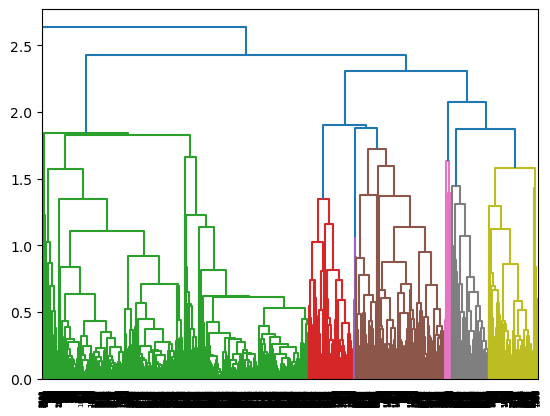

In [138]:
dn=hierarchy.dendrogram(hr)

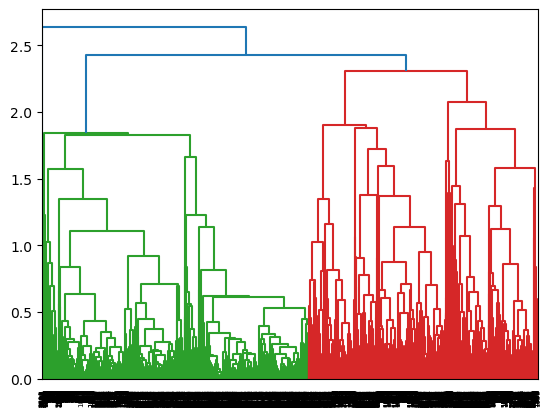

In [139]:
dn=hierarchy.dendrogram(hr,color_threshold=2.4)

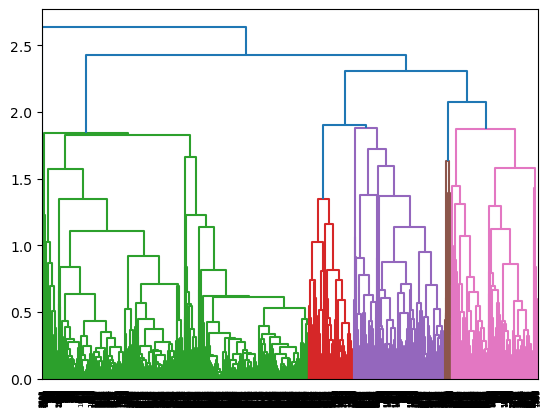

In [140]:
dn=hierarchy.dendrogram(hr,color_threshold=1.9)

# create the model

In [142]:
from sklearn.cluster import DBSCAN

In [143]:
model=DBSCAN(eps=0.5,min_samples=5)

In [144]:
model.fit(scaled_mn)

DBSCAN()

In [145]:
model.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [146]:
airlines['dbscan_labels']=model.labels_

In [147]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_labels,hac_labels,dbscan_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,2,0


In [148]:
dbscan_grp=airlines.groupby('dbscan_labels')

In [149]:
for x,y in dbscan_grp:
    print(x)

-1
0
1
2
3
4
5
6
7
8


In [150]:
for x,y in dbscan_grp:
    print(y)
    print(70*'_')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
106    109    96627        1182          1          1          3        49059   
112    115   124198           0          5          1          1        66330   
198    202     8669           0          1          3          1        11397   
226    230   117329           0          1          2          1         6448   
243    247   118934           0          5          1          1        66222   
275    279  1704838           0          1          1          1        17108   
371    376   107707           0          3          1          1        19407   
384    389    28193           0          5          1          4       103456   
392    398    11189           0          1          2          1         9044   
561    568   380930           0          2          2          1        22485   
850    861    25629         

In [151]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_labels,hac_labels,dbscan_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,2,0


In [152]:
X=airlines.iloc[:,0:12]
y=airlines.iloc[:,12]


In [153]:
X

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [154]:
y

0       1
1       1
2       1
3       1
4       2
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Name: Kmeans_labels, Length: 3999, dtype: int32

# visualise the data for KMeans_cluster(airlines data set)

In [156]:
from sklearn.manifold import TSNE

In [157]:
model=TSNE(n_components=2)

In [158]:
tsne_comps=model.fit_transform(X)
tsne_comps

array([[-40.805054 , -25.564903 ],
       [-53.201157 , -10.724569 ],
       [ -3.1410658, -40.452198 ],
       ...,
       [ 26.165455 ,  -9.25866  ],
       [ 14.074588 , -39.103035 ],
       [-40.541183 ,  41.57469  ]], dtype=float32)

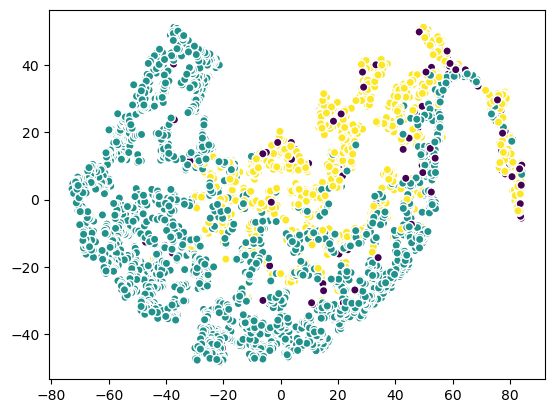

In [159]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

# visualise the data for Hierarchical Agglomerative Clustering_cluster(airlines data set)

In [161]:
y1=airlines.iloc[:,13]
y1

0       2
1       2
2       2
3       2
4       0
       ..
3994    2
3995    2
3996    2
3997    2
3998    2
Name: hac_labels, Length: 3999, dtype: int64

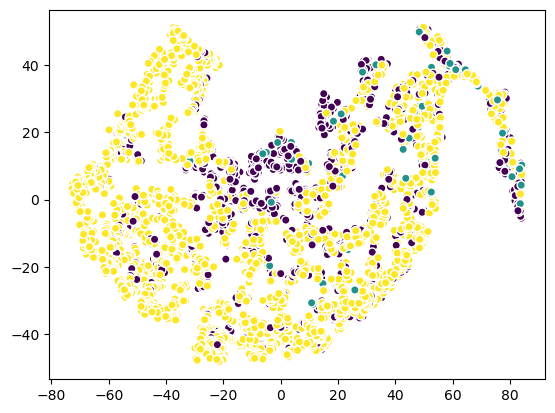

In [162]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y1,cmap='viridis',edgecolors='white')
plt.show()

# visualise the data for DBscan_cluster(airlines data set)

In [164]:
y2=airlines.iloc[:,14]
y2

0       0
1       0
2       0
3       0
4       1
       ..
3994    3
3995    3
3996    3
3997    0
3998    0
Name: dbscan_labels, Length: 3999, dtype: int64

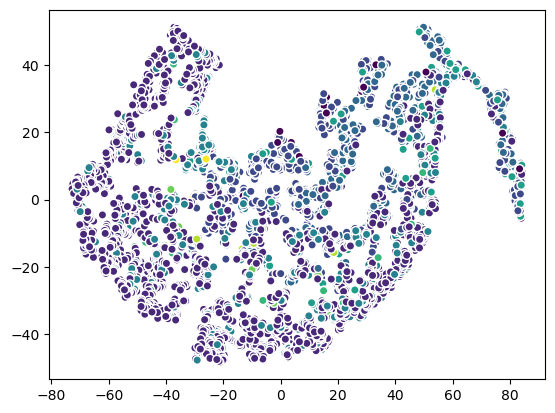

In [165]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y2,cmap='viridis',edgecolors='white')
plt.show()

# inferance point for airline data 

from given data build the culstering model for KMeans clustering ,Hierarchical Agglomerative Clustering and Dbscan clustering build the model sucessfully i got label values from kmeans cluster (0,1,2),Hierarchical Agglomerative Clustering (0,1,2) and Dbscan(-1,0,1,2,3,4,5,6,7,8) i didn't get any core and border points based on the model(eps ,min_sample)